In [1]:
import json
import numpy as np
import csv
import scipy.stats.distributions
from scipy.spatial.transform import Rotation
import os
from matplotlib import pyplot as plt
import random
import math
import csv

# Inputs

In [2]:
DATAFOLDER = "/Users/evanpan/Desktop/Experiment_related_files/Masters_paper_recordings"
EXPERIMENTID = "Experiment_0"

# Generate folders

In [3]:
OUTPUTROOTFOLDER = os.path.join(*[DATAFOLDER, EXPERIMENTID])
OUTPUTFOLDER = os.path.join(*[DATAFOLDER, EXPERIMENTID, "gazeTargetData"])
COLLECTEDDATAFOLDER = os.path.join(*[DATAFOLDER, EXPERIMENTID, "collectedData"])
try:
    os.mkdir(OUTPUTROOTFOLDER)
    os.mkdir(OUTPUTFOLDER)
    os.mkdir(COLLECTEDDATAFOLDER)
except:
    print("folders already exist")

# Generate data (calibration)

In [136]:

outputJsonCalibration = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
outputJsonRandomCalibration = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
outputJsonRandomPositions = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
outputJsonRandomPositionsWithAnchor = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}

angles = []
for i in range(-9, 10):
    if i != 0:
        angles.append(i*10)

for i in range (0, 1):
    # random.shuffle(angles)
    outputJsonCalibration["angle"].append(0)
    outputJsonCalibration["duration"].append(1)
    outputJsonCalibration["isTarget"].append(1)
    outputJsonCalibration["willReturnTo"].append(1)
    outputJsonCalibration["showOnward"].append(0)
    for angle in angles:
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonCalibration["angle"].append(angle/2)
            outputJsonCalibration["duration"].append(intermediateTargetTime)
            outputJsonCalibration["isTarget"].append(0)
            outputJsonCalibration["willReturnTo"].append(0)
            outputJsonCalibration["showOnward"].append(0)
        outputJsonCalibration["angle"].append(angle)
        outputJsonCalibration["duration"].append(1)
        outputJsonCalibration["isTarget"].append(1)
        outputJsonCalibration["willReturnTo"].append(0)
        outputJsonCalibration["showOnward"].append(0)
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonCalibration["angle"].append(angle/2)
            outputJsonCalibration["duration"].append(intermediateTargetTime)
            outputJsonCalibration["isTarget"].append(0) 
            outputJsonCalibration["willReturnTo"].append(0)
            outputJsonCalibration["showOnward"].append(0)

        outputJsonCalibration["angle"].append(0)
        outputJsonCalibration["duration"].append(1)
        outputJsonCalibration["isTarget"].append(1) 
        outputJsonCalibration["willReturnTo"].append(1)
        outputJsonCalibration["showOnward"].append(0)
        
for i in range (0, calibrationCount):
    random.shuffle(angles)
    outputJsonRandomCalibration["angle"].append(0)
    outputJsonRandomCalibration["duration"].append(1)
    outputJsonRandomCalibration["isTarget"].append(1)
    outputJsonRandomCalibration["willReturnTo"].append(1)
    outputJsonRandomCalibration["showOnward"].append(0)
    for angle in angles:
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonRandomCalibration["angle"].append(angle/2)
            outputJsonRandomCalibration["duration"].append(intermediateTargetTime)
            outputJsonRandomCalibration["isTarget"].append(0)
            outputJsonRandomCalibration["willReturnTo"].append(0)
            outputJsonRandomCalibration["showOnward"].append(0)
        outputJsonRandomCalibration["angle"].append(angle)
        outputJsonRandomCalibration["duration"].append(1)
        outputJsonRandomCalibration["isTarget"].append(1)
        outputJsonRandomCalibration["willReturnTo"].append(0)
        outputJsonRandomCalibration["showOnward"].append(0)
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonRandomCalibration["angle"].append(angle/2)
            outputJsonRandomCalibration["duration"].append(intermediateTargetTime)
            outputJsonRandomCalibration["isTarget"].append(0)
            outputJsonRandomCalibration["willReturnTo"].append(0) 
            outputJsonRandomCalibration["showOnward"].append(0)

        outputJsonRandomCalibration["angle"].append(0)
        outputJsonRandomCalibration["duration"].append(1)
        outputJsonRandomCalibration["isTarget"].append(1) 
        outputJsonRandomCalibration["willReturnTo"].append(1)
        outputJsonRandomCalibration["showOnward"].append(0)

#### generate random duration + position targets (Ver 1.0)

In [137]:
outputJsonRandomPositions = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
short_range = [1, 20]
medium_range = [20, 50]
long_range = [50, 90]
short_dwell = [0.100, 0.120]
medium_dwell = [0.200, 0.220]
longer_dwell = [0.300, 0.320]
longest_dwell = [1.200, 1.000]
count_of_samples = 45

ranges = [short_range, medium_range, long_range]
angles_short_range = np.arange(1, 20, (20-1)/count_of_samples)
angles_medium_range = np.arange(20, 50, (50-20)/count_of_samples)
angles_long_range = np.arange(50, 90, (90-50)/count_of_samples)
ranges = [angles_short_range, angles_medium_range, angles_long_range]
delta_angle_list = []
# generate all the delta angles and durations
for j in range(0, 3):
    for i in range(0, count_of_samples):
        angle = float(ranges[j][i])
        duration = float(random.uniform(short_dwell[0], short_dwell[1]))
        delta_angle_list.append([angle, duration, 1])
        # duration = float(random.uniform(medium_dwell[0], medium_dwell[1]))
        # delta_angle_list.append([angle, duration, 1])
        # duration = float(random.uniform(longer_dwell[0], longer_dwell[1]))
        # delta_angle_list.append([angle, duration, 1])
        duration = float(random.uniform(longest_dwell[0], longest_dwell[1]))
        delta_angle_list.append([angle, duration, 1])
    # for i in range(0, countPerRangeshortDwell):
random.shuffle(delta_angle_list)
# generate all the look-at-points
angle = 0
angle_list = [[0, 1, 1, 0]]
for i in range(0, len(delta_angle_list)):
    sign = (random.randint(0, 1) - 0.5)
    sign = sign / abs(sign)
    new_angle = angle + sign * delta_angle_list[i][0]
    if new_angle < -90 or new_angle > 90:
        new_angle = angle - sign * delta_angle_list[i][0]
    angle = new_angle
    angle_list += [[angle, delta_angle_list[i][1], 1, 0]]

# add that to the output json
for i in range(0, len(angle_list)):
    outputJsonRandomPositions["angle"].append(angle_list[i][0])
    outputJsonRandomPositions["duration"].append(angle_list[i][1])
    outputJsonRandomPositions["isTarget"].append(angle_list[i][2])
    outputJsonRandomPositions["willReturnTo"].append(0)
    outputJsonRandomPositions["showOnward"].append(0)

# generate random duration + position targets (Ver 2.0)

In [138]:
import numpy as np
from scipy.spatial import distance, ConvexHull
import itertools
outputJsonRandomPositions = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[]}
# Sample data (replace this with your [x, y] sequence)
start_angles = np.arange(-90, 90, 10)
end_angles = np.arange(-90, 90, 10)
paired_angles = []
for start in start_angles:
    for end in end_angles:
        if abs(start - end) <= 90 and abs(start - end) >= 5:
            paired_angles.append([start, end])
vertex_data = paired_angles
V = np.arange(len(vertex_data))
G = {}
for v in V:
    G[v] = []
    for other_v in V:
        if vertex_data[v][1] == vertex_data[other_v][0]:
            G[v].append(other_v)
    random.shuffle(G[v])
# edges
def hamilton(G, size, pt, path=[]):
    # print('hamilton called with pt={}, path={}'.format(pt, path))
    if pt not in set(path):
        path.append(pt)
        if len(path)==size:
            return path
        for pt_next in G.get(pt, []):
            res_path = [i for i in path]
            candidate = hamilton(G, size, pt_next, res_path)
            if candidate is not None:  # skip loop or dead end
                return candidate
        # print('path {} is a dead end'.format(path))
    # else:
    #     print('pt {} already in path {}'.format(pt, path))
    # loop or dead end, None is implicitly returned

# compute the first half of samples
path1 = hamilton(G, len(vertex_data), 20, []) # 10 is the starting point of the path (arbitrary)
is_long_duration_list = np.zeros(len(path1)) # keep track of the long duration samples from the first half
is_long_duration_list[path1[0]] += 1
angle_list = [[vertex_data[path1[0]][0], 1, 1, 0]]
for i in range(1, len(path1)):
    angle = vertex_data[path1[i]][0]
    is_long = random.random() > 0.5
    if is_long:
        duration = 1
        is_long_duration_list[path1[i]] += 1
    else:
        duration = 0.1
    angle_list.append([angle, duration, 1, 0])
# compute the second half of samples, this time with a newly randomized graph to avoid the same path
for v in V:
    random.shuffle(G[v])

# find a vertex pair that starts on the last point of the first path
start = -1
for i in range(0, len(vertex_data)):
    if vertex_data[i][0] == vertex_data[path1[-1]][1]:
        start = i
        break
is_long_duration_this_turn = np.ones(len(path1)) - is_long_duration_list
path2 = hamilton(G, len(vertex_data), start, []) # starting at the final point of the first path
angle_list2 = [[vertex_data[path2[0]][0], 1, 1, 0]]
for i in range(1, len(path2)):
    angle = vertex_data[path2[i]][0]
    is_long = is_long_duration_this_turn[path2[i]] > 0
    if is_long:
        duration = 1
    else:
        duration = 0.1
    angle_list2.append([angle, duration, 1, 0])

is_long = is_long_duration_this_turn[path2[-1]] > 0
if is_long:
    duration = 1
else:
    duration = 0.1
angle_list2.append([vertex_data[path2[-1]][1], duration, 1, 0])
angle_list += angle_list2

for i in range(0, len(angle_list)):
    outputJsonRandomPositions["angle"].append(float(angle_list[i][0]))
    outputJsonRandomPositions["duration"].append(float(angle_list[i][1]))
    outputJsonRandomPositions["isTarget"].append(int(angle_list[i][2]))
    outputJsonRandomPositions["willReturnTo"].append(0)

Text(0, 0.5, 'starting angle (deg)')

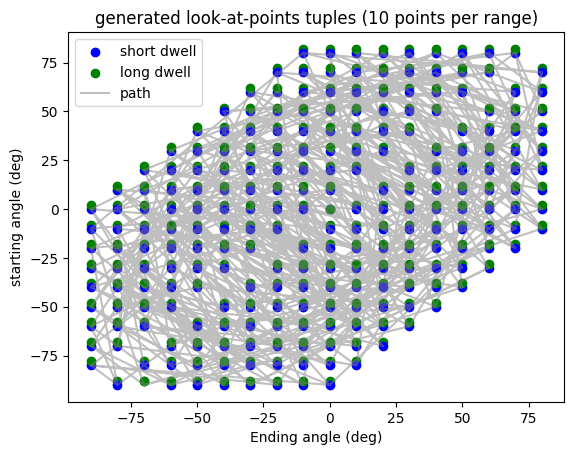

In [139]:
from matplotlib import pyplot as plt
outputJsonRandomPositions["angle"]
tuple_list = []
for i in range(0, len(outputJsonRandomPositions["angle"])-1):
    if outputJsonRandomPositions["duration"][i] <= 0.13:
        tuple_list.append([outputJsonRandomPositions["angle"][i], outputJsonRandomPositions["angle"][i+1]])
        plt.scatter(tuple_list[-1][0], tuple_list[-1][1], c="b")
    else:
        tuple_list.append([outputJsonRandomPositions["angle"][i], outputJsonRandomPositions["angle"][i+1]])
        plt.scatter(tuple_list[-1][0], tuple_list[-1][1]+2, c="g")
# plt.scatter(tuple_list[-1][0], tuple_list[-1][1], c="b")
path = np.array(tuple_list)
plt.scatter(0, 0, c="b", label="short dwell")
plt.scatter(0, 0, c="g", label="long dwell") 
plt.plot(path[:,0], path[:,1], c="gray", alpha=0.5, label="path")
plt.title("generated look-at-points tuples (10 points per range)")
plt.xlabel("Ending angle (deg)")
plt.legend()
plt.ylabel("starting angle (deg)")

In [140]:
# for the dwell time with anchor experiment
countPerRangeLongDwell = 10
countPerRangeshortDwell = 10
short_range = [1, 20]
medium_range = [20, 50]
long_range = [50, 90]
short_dwell = [0.300, 0.550]
long_dwell = [1.200, 1.000]

outputJsonRandomPositionsWithAnchor_LIST = []
all_trials_list = []
for k in range(0, len(dwellTimeTargets)):
    outputJsonRandomPositionsWithAnchor = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[]}

    delta_angle_list = []
    target_angle = dwellTimeTargets[k]
    # generate the delta angles
    for j in range(0, 3):
        for i in range(0, countPerRangeLongDwell):
            angle = float(random.randint(int(ranges[j][0]), int(ranges[j][1])))
            # FOR long duration
            duration = float(random.uniform(long_dwell[0], long_dwell[1]))
            delta_angle_list.append([angle, duration, 1])
            # FOR short duration
            duration = float(random.uniform(short_dwell[0], short_dwell[1]))
            delta_angle_list.append([angle, duration, 1])
    random.shuffle(delta_angle_list)

    # compute the angles
    angle_list = [[target_angle, long_dwell[1], 1, 1]]
    for i in range(0, len(delta_angle_list)):
        sign = (random.randint(0, 1) - 0.5)
        sign = sign / abs(sign)
        new_angle = target_angle + sign * delta_angle_list[i][0]
        if new_angle < -90 or new_angle > 90:
            new_angle = target_angle - sign * delta_angle_list[i][0]
        angle = new_angle
        angle_list += [[angle, delta_angle_list[i][1], 1, 0]]
        angle_list += [[target_angle, long_dwell[1], 1, 1]]
    # add that to the output json
    for i in range(0, len(angle_list)):
        outputJsonRandomPositionsWithAnchor["angle"].append(angle_list[i][0])
        outputJsonRandomPositionsWithAnchor["duration"].append(angle_list[i][1])
        outputJsonRandomPositionsWithAnchor["isTarget"].append(angle_list[i][2])
        outputJsonRandomPositionsWithAnchor["willReturnTo"].append(angle_list[i][3])
    all_trials_list.append(outputJsonRandomPositionsWithAnchor)

In [74]:
json.dump(outputJsonCalibration, open(os.path.join(*[OUTPUTFOLDER, "calibration.json"]), "w"))
json.dump(outputJsonRandomCalibration, open(os.path.join(*[OUTPUTFOLDER, "randomCalibration.json"]), "w"))
json.dump(outputJsonRandomPositions, open(os.path.join(*[OUTPUTFOLDER, "RandomPositions.json"]), "w"))
for i in range(0, len(all_trials_list)):
    json.dump(all_trials_list[i], open(os.path.join(*[OUTPUTFOLDER, "anchoredDwell_{}.json".format(i)]), "w"))

# Visualze generated data distributions

Text(0, 0.5, 'starting angle (deg)')

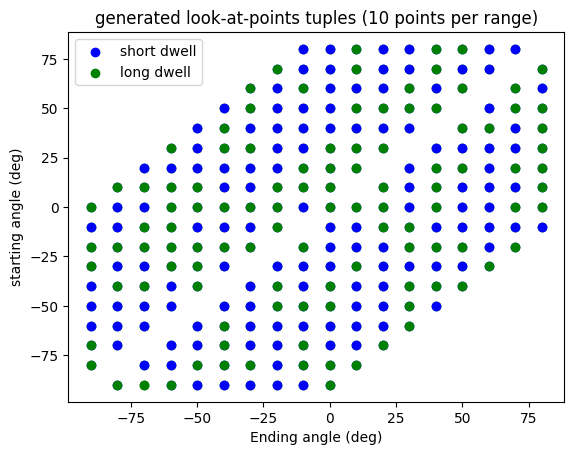

In [75]:
from matplotlib import pyplot as plt
outputJsonRandomPositions["angle"]
tuple_list = []

for i in range(0, len(outputJsonRandomPositions["angle"])-1):
    if outputJsonRandomPositions["duration"][i] <= 0.13:
        tuple_list.append([outputJsonRandomPositions["angle"][i], outputJsonRandomPositions["angle"][i+1]])
        plt.scatter(tuple_list[-1][0], tuple_list[-1][1], c="b")
    else:
        tuple_list.append([outputJsonRandomPositions["angle"][i], outputJsonRandomPositions["angle"][i+1]])
        plt.scatter(tuple_list[-1][0], tuple_list[-1][1], c="g")
        
# plt.scatter(tuple_list[-1][0], tuple_list[-1][1], c="b")
plt.scatter(0, 0, c="b", label="short dwell")
plt.scatter(0, 0, c="g", label="long dwell") 
plt.title("generated look-at-points tuples (10 points per range)")
plt.xlabel("Ending angle (deg)")
plt.legend()
plt.ylabel("starting angle (deg)")

# Pilot 

In [76]:
# for the dwell time with anchor experiment
countPerRangeLongDwell = 12
countPerRangeshortDwell = 12
short_range = [1, 20]
medium_range = [20, 50]
long_range = [50, 90]
short_dwell = [0.300, 0.550]
long_dwell = [1.200, 1.000]

dwellTimeTargets = [20, 40, 60]
all_trials_symmetric_list = [[],[],[],[],[],[],[]]
for k in range(0, len(dwellTimeTargets)):
    outputJsonRandomPositionsWithAnchor_SYMMETRIC = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[]}
    outputJsonRandomPositionsWithAnchor_SYMMETRIC_negative = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[]}
    delta_angle_list = []
    target_angle = dwellTimeTargets[k]
    # generate the delta angles
    for j in range(0, 3):
        for i in range(0, countPerRangeLongDwell):
            angle = float(random.randint(int(ranges[j][0]), int(ranges[j][1])))
            # FOR long duration
            duration = float(random.uniform(long_dwell[0], long_dwell[1]))
            delta_angle_list.append([angle, duration, 1])
            # FOR short duration
            duration = float(random.uniform(short_dwell[0], short_dwell[1]))
            delta_angle_list.append([angle, duration, 1])
    random.shuffle(delta_angle_list)

    # compute the angles (for right side (positive))
    angle_list = [[target_angle, long_dwell[1], 1, 1]]
    for i in range(0, len(delta_angle_list)):
        sign = (random.randint(0, 1) - 0.5)
        sign = sign / abs(sign)
        new_angle = target_angle + sign * delta_angle_list[i][0]
        if new_angle < -90 or new_angle > 90:
            new_angle = target_angle - sign * delta_angle_list[i][0]
        angle = new_angle
        angle_list += [[angle, delta_angle_list[i][1], 1, 0]]
        angle_list += [[target_angle, long_dwell[1], 1, 1]]

    negative_angle_list = []
    for item in angle_list:
        negative_angle_list.append([-item[0], item[1], item[2], item[3]])
    # add that to the output json
    for i in range(0, len(angle_list)):
        outputJsonRandomPositionsWithAnchor_SYMMETRIC["angle"].append(angle_list[i][0])
        outputJsonRandomPositionsWithAnchor_SYMMETRIC["duration"].append(angle_list[i][1])
        outputJsonRandomPositionsWithAnchor_SYMMETRIC["isTarget"].append(angle_list[i][2])
        outputJsonRandomPositionsWithAnchor_SYMMETRIC["willReturnTo"].append(angle_list[i][3])

    for i in range(0, len(negative_angle_list)):
        outputJsonRandomPositionsWithAnchor_SYMMETRIC_negative["angle"].append(negative_angle_list[i][0])
        outputJsonRandomPositionsWithAnchor_SYMMETRIC_negative["duration"].append(negative_angle_list[i][1])
        outputJsonRandomPositionsWithAnchor_SYMMETRIC_negative["isTarget"].append(negative_angle_list[i][2])
        outputJsonRandomPositionsWithAnchor_SYMMETRIC_negative["willReturnTo"].append(negative_angle_list[i][3])

    all_trials_symmetric_list[k+1] = outputJsonRandomPositionsWithAnchor_SYMMETRIC
    all_trials_symmetric_list[k+4] = outputJsonRandomPositionsWithAnchor_SYMMETRIC_negative

all_trials_symmetric_list[0] = all_trials_list[0]
for i in range(0, len(all_trials_symmetric_list)):
    json.dump(all_trials_symmetric_list[i], open(os.path.join(*[OUTPUTFOLDER, "anchoredDwell_sym_{}.json".format(i)]), "w"))

# Calibration step

In [123]:

outputJsonCalibration = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
outputJsonRandomCalibration = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}

angles = []
for i in range(-9, 10):
    if i != 0:
        angles.append(i*10)

for i in range (0, 1):
    # random.shuffle(angles)
    outputJsonCalibration["angle"].append(0)
    outputJsonCalibration["duration"].append(1)
    outputJsonCalibration["isTarget"].append(1)
    outputJsonCalibration["willReturnTo"].append(1)
    outputJsonCalibration["showOnward"].append(0)
    for angle in angles:
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonCalibration["angle"].append(angle/2)
            outputJsonCalibration["duration"].append(intermediateTargetTime)
            outputJsonCalibration["isTarget"].append(0)
            outputJsonCalibration["willReturnTo"].append(0)
            outputJsonCalibration["showOnward"].append(0)
        outputJsonCalibration["angle"].append(angle)
        outputJsonCalibration["duration"].append(1)
        outputJsonCalibration["isTarget"].append(1)
        outputJsonCalibration["willReturnTo"].append(0)
        outputJsonCalibration["showOnward"].append(0)
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonCalibration["angle"].append(angle/2)
            outputJsonCalibration["duration"].append(intermediateTargetTime)
            outputJsonCalibration["isTarget"].append(0) 
            outputJsonCalibration["willReturnTo"].append(0)
            outputJsonCalibration["showOnward"].append(0)

        outputJsonCalibration["angle"].append(0)
        outputJsonCalibration["duration"].append(1)
        outputJsonCalibration["isTarget"].append(1) 
        outputJsonCalibration["willReturnTo"].append(1)
        outputJsonCalibration["showOnward"].append(0)
        
for i in range (0, calibrationCount):
    random.shuffle(angles)
    outputJsonRandomCalibration["angle"].append(0)
    outputJsonRandomCalibration["duration"].append(1)
    outputJsonRandomCalibration["isTarget"].append(1)
    outputJsonRandomCalibration["willReturnTo"].append(1)
    outputJsonRandomCalibration["showOnward"].append(0)
    for angle in angles:
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonRandomCalibration["angle"].append(angle/2)
            outputJsonRandomCalibration["duration"].append(intermediateTargetTime)
            outputJsonRandomCalibration["isTarget"].append(0)
            outputJsonRandomCalibration["willReturnTo"].append(0)
            outputJsonRandomCalibration["showOnward"].append(0)
        outputJsonRandomCalibration["angle"].append(angle)
        outputJsonRandomCalibration["duration"].append(1)
        outputJsonRandomCalibration["isTarget"].append(1)
        outputJsonRandomCalibration["willReturnTo"].append(0)
        outputJsonRandomCalibration["showOnward"].append(0)
        if abs(angle) >= 50:
            # if it's 0 then it's an intermediate target
            outputJsonRandomCalibration["angle"].append(angle/2)
            outputJsonRandomCalibration["duration"].append(intermediateTargetTime)
            outputJsonRandomCalibration["isTarget"].append(0)
            outputJsonRandomCalibration["willReturnTo"].append(0) 
            outputJsonRandomCalibration["showOnward"].append(0)

        outputJsonRandomCalibration["angle"].append(0)
        outputJsonRandomCalibration["duration"].append(1)
        outputJsonRandomCalibration["isTarget"].append(1) 
        outputJsonRandomCalibration["willReturnTo"].append(1)
        outputJsonRandomCalibration["showOnward"].append(0)

json.dump(outputJsonCalibration, open(os.path.join(*[OUTPUTFOLDER, "calibration.json"]), "w"))

# Pilot 2 Dwell time condition, not random

In [124]:
# for the dwell time with anchor experiment
countPerRangeLongDwell = 12
countPerRangeshortDwell = 12
short_dwell = 0.1
long_dwell = 1.0
dwell_times = [[0.035, 0.5], [0.05, 0.8], [0.1, 1.0], [0.2, 1.5], [0.3, 0.4]]
target_angle_counts = 5
target_angle_list = [20, -40]
outputJsonRepeatedPilot = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[]}
angle_list = [[0, 1, 1, 1]]
for i in range(0, len(dwell_times)):
    for k in range(0, len(target_angle_list)):
        for j in range(0, target_angle_counts):
            angle_list.append([target_angle_list[k], dwell_times[i][0], 1, 0])
            angle_list.append([0, 1, 1, 1])
            angle_list.append([target_angle_list[k], dwell_times[i][1], 1, 0])
            angle_list.append([0, 1, 1, 1])
for i in range(0, len(angle_list)):
    outputJsonRepeatedPilot["angle"].append(angle_list[i][0])
    outputJsonRepeatedPilot["duration"].append(angle_list[i][1])
    outputJsonRepeatedPilot["isTarget"].append(angle_list[i][2])
    outputJsonRepeatedPilot["willReturnTo"].append(angle_list[i][3])

# for i in range(0, len(all_trials_symmetric_list)):
# json.dump(outputJsonRepeatedPilot, open(os.path.join(*[OUTPUTFOLDER, "continiously_vary_pilot.json"]), "w"))


# Pilot 2 Dwell time conditions, random order

In [125]:
outputJsonRepeatedPilot = {}
# for the dwell time with anchor experiment
countPerRangeLongDwell = 12
countPerRangeshortDwell = 12
short_dwell = 0.1
long_dwell = 1.0
dwell_times = [0.035, 0.5, 0.05, 0.8, 0.1, 1.0, 0.2, 1.5, 0.3, 0.4]
target_angle_counts = 5
target_angle_list = [20, -40]
outputJsonRepeatedPilot = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
angle_list = []
for i in range(0, len(dwell_times)):
    for k in range(0, len(target_angle_list)):
        for j in range(0, target_angle_counts):
            angle_list.append([target_angle_list[k], dwell_times[i]])
            angle_list.append([target_angle_list[k], dwell_times[i]])
random.shuffle(angle_list)
output_angle_list = [[0, 1, 1, 1]]
for i in range(0, len(angle_list)):
    output_angle_list.append([angle_list[i][0], angle_list[i][1], 1, 0])
    output_angle_list.append([0, 1, 1, 1])


for i in range(0, len(output_angle_list)):
    outputJsonRepeatedPilot["angle"].append(output_angle_list[i][0])
    outputJsonRepeatedPilot["duration"].append(output_angle_list[i][1])
    outputJsonRepeatedPilot["isTarget"].append(output_angle_list[i][2])
    outputJsonRepeatedPilot["willReturnTo"].append(output_angle_list[i][3])
    outputJsonRepeatedPilot["showOnward"].append(0)

json.dump(outputJsonRepeatedPilot, open(os.path.join(*[OUTPUTFOLDER, "continiously_vary_dwell_pilot_random_order.json"]), "w"))


In [126]:
print(np.sum(outputJsonRepeatedPilot["duration"]))

298.7


# Pilot 3: Onward Conditions

In [127]:
outputJsonOnwardConditionPilot = {}
# for the dwell time with anchor experiment
dwell_times = [0.05, 0.4]
target_angle_counts = 5
target_angle_list = [20, -40]
onward_angle_list = [[30,40,50,60], [-50,-60,-70,-80]]
outputJsonOnwardConditionPilot = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
angle_list = []
for i in range(0, len(dwell_times)):
    for k in range(0, len(target_angle_list)):
        for m in range(0, len(onward_angle_list[k])):
            for j in range(0, target_angle_counts):
                if onward_angle_list[k][m] == target_angle_list[k]:                    
                    angle_list.append([[target_angle_list[k], dwell_times[i]]])
                else:
                    angle_list.append([[target_angle_list[k], dwell_times[i]], [onward_angle_list[k][m], 1]])
random.shuffle(angle_list)
# for i in range(0, len(target_angle_list)):
#     for k in range(0, len(dwell_times)):
#         for j in range(0, target_angle_counts):
#             angle_list = [[[target_angle_list[i], dwell_times[k]]]] + angle_list
output_angle_list = [[0, 1, 1, 0, 0]]
for i in range(0, len(angle_list)):
    # for each set of angels in the list, add the corresponding starting angles
    for a in range(0, len(angle_list[i])):
        if len(angle_list[i]) > 1:
            if a == 0:
                output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 1])
            else:
                output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 0])
        else:
            output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 0])
    output_angle_list.append([0, 1, 1, 0, 0])


for i in range(0, len(output_angle_list)):
    outputJsonOnwardConditionPilot["angle"].append(output_angle_list[i][0])
    outputJsonOnwardConditionPilot["duration"].append(output_angle_list[i][1])
    outputJsonOnwardConditionPilot["isTarget"].append(output_angle_list[i][2])
    outputJsonOnwardConditionPilot["willReturnTo"].append(output_angle_list[i][3])
    outputJsonOnwardConditionPilot["showOnward"].append(output_angle_list[i][4])
json.dump(outputJsonOnwardConditionPilot, open(os.path.join(*[OUTPUTFOLDER, "onward_condition_pilot.json"]), "w"))

outputJsonOnwardConditionPilotPrimer = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
angle_list = []
for i in range(0, len(target_angle_list)):
    for k in range(0, len(dwell_times)):
        for j in range(0, target_angle_counts):
            angle_list = [[[target_angle_list[i], dwell_times[k]]]] + angle_list
output_angle_list = [[0, 1, 1, 0, 0]]
for i in range(0, len(angle_list)):
    # for each set of angels in the list, add the corresponding starting angles
    for a in range(0, len(angle_list[i])):
        if len(angle_list[i]) > 1:
            if a == 0:
                output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 1])
            else:
                output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 0])
        else:
            output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 0])
    output_angle_list.append([0, 1, 1, 0, 0])
for i in range(0, len(output_angle_list)):
    outputJsonOnwardConditionPilotPrimer["angle"].append(output_angle_list[i][0])
    outputJsonOnwardConditionPilotPrimer["duration"].append(output_angle_list[i][1])
    outputJsonOnwardConditionPilotPrimer["isTarget"].append(output_angle_list[i][2])
    outputJsonOnwardConditionPilotPrimer["willReturnTo"].append(output_angle_list[i][3])
    outputJsonOnwardConditionPilotPrimer["showOnward"].append(output_angle_list[i][4])
json.dump(outputJsonOnwardConditionPilotPrimer, open(os.path.join(*[OUTPUTFOLDER, "onward_condition_pilot_primer.json"]), "w"))

In [128]:
print(len(angle_list))
print(np.sum(outputJsonOnwardConditionPilot["duration"]))

20
179.0


# Pilot 4: Direction change donditions

In [129]:
# for the dwell time with anchor experiment
dwell_times = [0.05, 0.4]
target_angle_counts = 5
target_angle_list = [20, -40]
onward_angle_list = [[10, 0, -10, -20, -30], [-30, -20, -10, 0, 10]]
outputJsonDireChangeConditionPilot = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
angle_list = []
for i in range(0, len(dwell_times)):
    for k in range(0, len(target_angle_list)):
        for m in range(0, len(onward_angle_list[k])):
            for j in range(0, target_angle_counts):
                if onward_angle_list[k][m] == target_angle_list[k]:                    
                    angle_list.append([[target_angle_list[k], dwell_times[i]]])
                else:
                    angle_list.append([[target_angle_list[k], dwell_times[i]], [onward_angle_list[k][m], 1]])
random.shuffle(angle_list)
output_angle_list = [[0, 1, 1, 0, 0]]
for i in range(0, len(angle_list)):
    # for each set of angels in the list, add the corresponding starting angles
    for a in range(0, len(angle_list[i])):
        if len(angle_list[i]) > 1:
            if a == 0:
                output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 1])
            else:
                output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 0])
        else:
            output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 0])
    output_angle_list.append([0, 1, 1, 0, 0])


for i in range(0, len(output_angle_list)):
    outputJsonDireChangeConditionPilot["angle"].append(output_angle_list[i][0])
    outputJsonDireChangeConditionPilot["duration"].append(output_angle_list[i][1])
    outputJsonDireChangeConditionPilot["isTarget"].append(output_angle_list[i][2])
    outputJsonDireChangeConditionPilot["willReturnTo"].append(output_angle_list[i][3])
    outputJsonDireChangeConditionPilot["showOnward"].append(output_angle_list[i][4])

json.dump(outputJsonDireChangeConditionPilot, open(os.path.join(*[OUTPUTFOLDER, "rapid_direction_change_condition_pilot.json"]), "w"))

In [130]:
print(np.sum(outputJsonDireChangeConditionPilot["duration"]))

223.5


# Pilot 5: Tennis Example

In [131]:
# for the dwell time with anchor experiment
dwell_times = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
target_angle_counts = 10
target_angle_list = [20, 40, 60]
outputJsonDireChangeConditionPilot = {"angle":[], "duration":[], "isTarget":[], "willReturnTo":[], "showOnward":[]}
angle_list = []
signn = 1
for i in range(0, len(dwell_times)):
    for k in range(0, len(target_angle_list)):
        angle_list.append([])
        for j in range(0, target_angle_counts):            
            angle_list[-1].append([signn * target_angle_list[k], dwell_times[i]])
            signn = -signn
output_angle_list = [[0, 1, 1, 0, 0]]
for i in range(0, len(angle_list)):
    for a in range(0, len(angle_list[i])):
        output_angle_list.append([angle_list[i][a][0], angle_list[i][a][1], 1, 0, 1])
    output_angle_list.append([0, 1, 1, 0, 0])


for i in range(0, len(output_angle_list)):
    outputJsonDireChangeConditionPilot["angle"].append(output_angle_list[i][0])
    outputJsonDireChangeConditionPilot["duration"].append(output_angle_list[i][1])
    outputJsonDireChangeConditionPilot["isTarget"].append(output_angle_list[i][2])
    outputJsonDireChangeConditionPilot["willReturnTo"].append(output_angle_list[i][3])
    outputJsonDireChangeConditionPilot["showOnward"].append(output_angle_list[i][4])

json.dump(outputJsonDireChangeConditionPilot, open(os.path.join(*[OUTPUTFOLDER, "tennis_condition_pilot.json"]), "w"))

In [132]:
print(np.sum(outputJsonDireChangeConditionPilot["duration"]))

86.49999999999999
